In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)




OpenCV Version : 3.3.0 


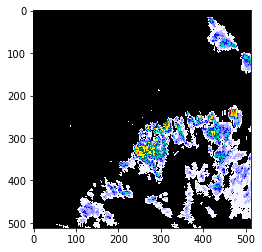

In [2]:
img = cv2.imread(
    'C:/Users/jakka/Source/Repos/jordown/rAIn/weatherdata/theweatherchaser/IDR713.T.201610121442.png',
    1)

backtorgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(backtorgb)
plt.show()

In [3]:
height, width, channels = img.shape
print (height)
print (width)
print (channels)

512
512
3


In [4]:

size = 64

w = int(width/size)
h = int(height/size)
       
print (w)
print(h)


8
8


In [5]:
def image_colorfulness(image):
	# split the image into its respective RGB components
	(B, G, R) = cv2.split(image.astype("float"))
 
	# compute rg = R - G
	rg = np.absolute(R - G)
 
	# compute yb = 0.5 * (R + G) - B
	yb = np.absolute(0.5 * (R + G) - B)
 
	# compute the mean and standard deviation of both `rg` and `yb`
	(rbMean, rbStd) = (np.mean(rg), np.std(rg))
	(ybMean, ybStd) = (np.mean(yb), np.std(yb))
 
	# combine the mean and standard deviations
	stdRoot = np.sqrt((rbStd ** 2) + (ybStd ** 2))
	meanRoot = np.sqrt((rbMean ** 2) + (ybMean ** 2))
 
	# derive the "colorfulness" metric and return it
	return stdRoot + (0.3 * meanRoot)

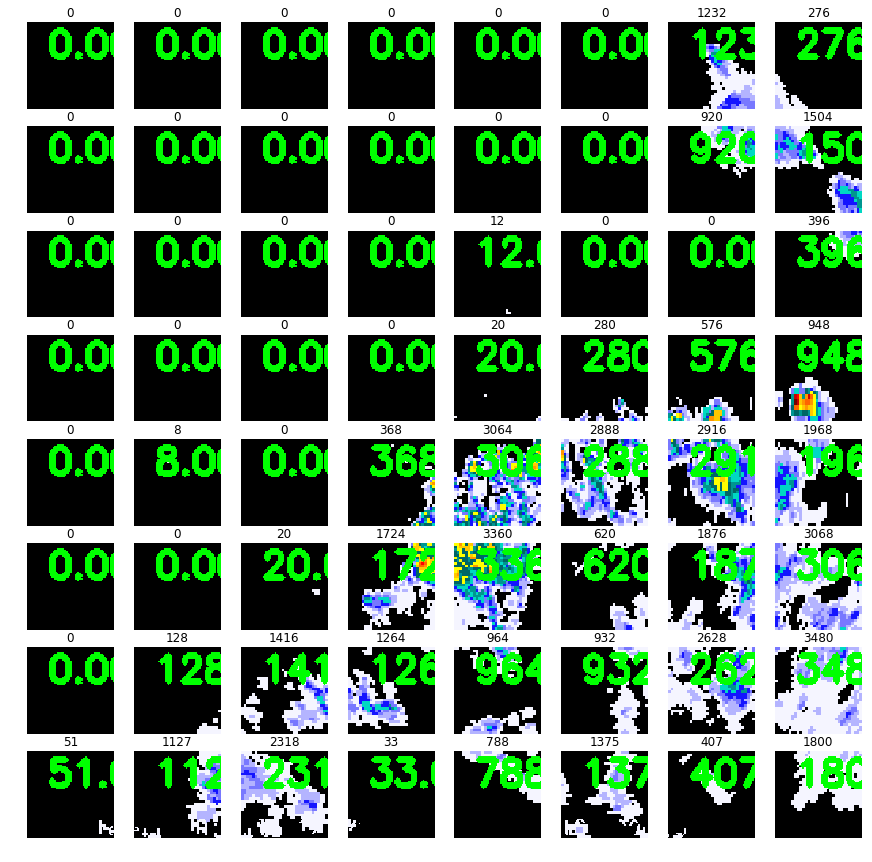

In [9]:

def nottrans(image):
    image = cv2.cvtColor(crop_img,cv2.COLOR_BGR2GRAY)
    c = cv2.countNonZero(image)  
    #c = image[0,0,2]
    #print(c)
    return c
    
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference

plt.figure(figsize=(15, 15))

i=1
for celly in range(0, h):
    for cellx in range(0, w):
        offsetX = cellx * size
        offsetY = celly * size
        crop_img = img[offsetY:offsetY+size, offsetX:offsetX+size]
        #print("%s %s %s %s" % (offsetY,offsetY+h, offsetX, offsetX+w))
        height, width, channels = crop_img.shape
        backtorgb2 = cv2.cvtColor(crop_img,cv2.COLOR_BGR2RGB)
        
        C = nottrans(crop_img)
        #print(C)
        # display the colorfulness score on the image
        cv2.putText(backtorgb2, "{:.2f}".format(C), (15, 25), 
        cv2.FONT_HERSHEY_SIMPLEX, .9, (0, 255, 0), 3)
        
        plt.subplot(w, h, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title(C)
        #plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(backtorgb2)
        
        #plt.imshow(backtorgb2)
        #plt.show()
        cv2.imwrite("C:/Temp/imagery/cv/%s%s%s%s.png" % (offsetY,offsetY+h, offsetX, offsetX+w) ,crop_img)

plt.show()
        
#ready for colorfulness? https://www.pyimagesearch.com/2017/06/05/computing-image-colorfulness-with-opencv-and-python/
    

